## 1-1-5. 경사하강법 (Gradient Descent)

[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%203/3.1_gradient_descent.ipynb)

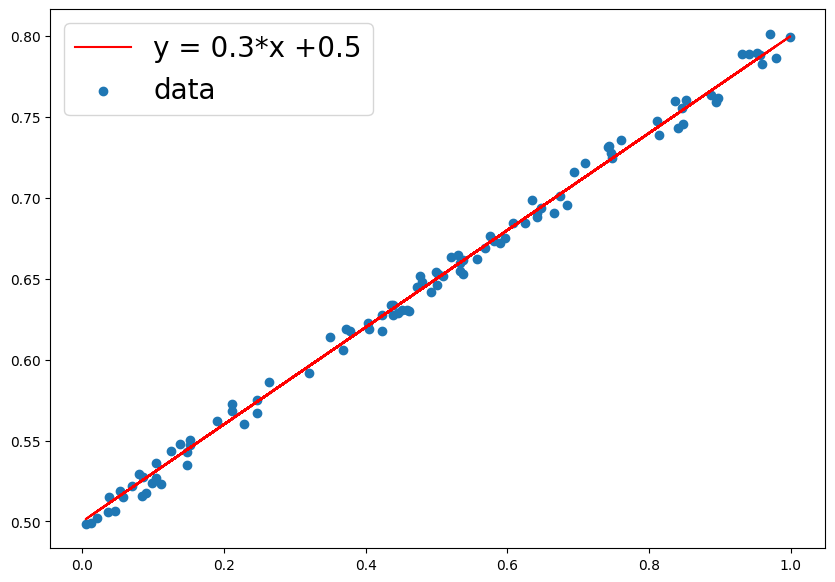

w: 0.3, b: 0.5


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x +{b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [2]:
# 최대 반복 횟수
num_epoch = 1000

# 학습율 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b

    # Loss Function 정의
    error = 0.5 * ((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))


 0 w = 0.15840, b = 0.54749 error = 0.29668
 5 w = 0.18909, b = 0.55648 error = 0.05857
10 w = 0.20663, b = 0.54768 error = 0.04233
15 w = 0.22138, b = 0.54011 error = 0.03073
20 w = 0.23386, b = 0.53371 error = 0.02244
25 w = 0.24441, b = 0.52830 error = 0.01652
30 w = 0.25332, b = 0.52373 error = 0.01228
35 w = 0.26086, b = 0.51986 error = 0.00925
40 w = 0.26723, b = 0.51660 error = 0.00709
45 w = 0.27262, b = 0.51383 error = 0.00555
------------------------------------------------------------
48 w = 0.3, b = 0.5 error = 0.00484


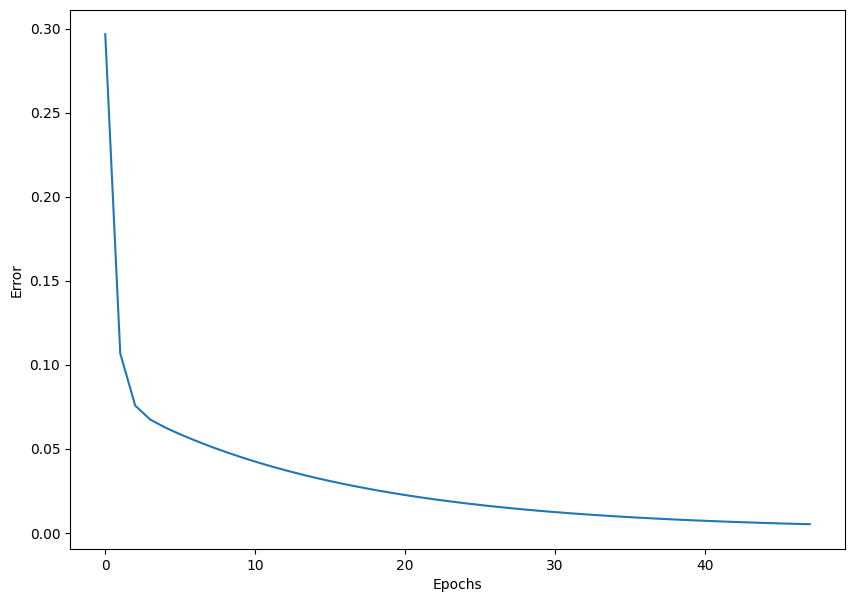

In [3]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()